In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Hp\Documents\Email_spam_detection\spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [3]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.Message, df.spam, test_size=0.25)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count= v.fit_transform(X_train.values)
X_train_count.toarray()[:3] 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [7]:
emails= [
    'Hey mohan, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking,exclusive offer just for you.Dont miss this reward!'
]
emails_count= v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [8]:
X_test_count= v.transform(X_test)
model.score(X_test_count, y_test)

0.9870782483847811

In [9]:
from sklearn.pipeline import Pipeline
clf= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [10]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [11]:
clf.score(X_test, y_test)

0.9870782483847811

In [12]:
clf.predict(emails)

array([0, 1])

In [13]:
clf.predict(['Offer of 50% on a new TV with a free gift vouche dint miss this opportunity'])

array([1])

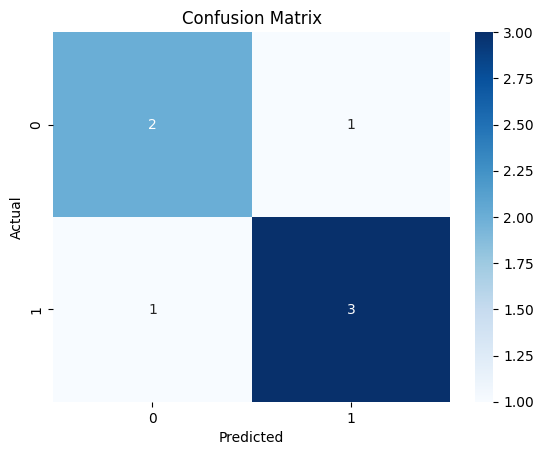

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#let's say these are the results our model predicted
actual= [1,0,1,1,0,0,1] #1 = spam , 0= ham
predicted= [1,0,0,1,0,1,1]

cm = confusion_matrix(actual, predicted)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix')
plt.show()
plt.savefig("images/confusion_matrix.png")

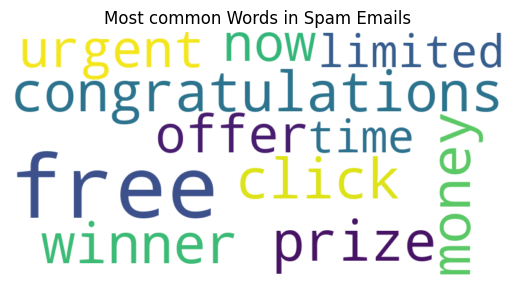

<Figure size 640x480 with 0 Axes>

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text= "congratulations winner free money click here prize urgent offer free free now limited time"

wordcloud= WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most common Words in Spam Emails')
plt.show()
plt.savefig("images/wordcloud.png")